In [311]:
# pandas nodig om bestanden te importeren

import pandas as pd
from datetime import datetime
import numpy as np
import pandas.api.types as ptypes


In [312]:
# excel bestand maxilia geimporteerd en kolommen gefilterd 

data = pd.read_excel(r'/Users/lisannepeeters/Downloads/20190615-Rapportage-DE.xlsx')
df = pd.DataFrame(data, columns = ['Accountnumber','Orderdate','OrderID',
                                   'TurnoverLead', 'BuyinLead'])

df.head()

,Accountnumber,Orderdate,OrderID,TurnoverLead,BuyinLead
0,157080.0,2018-01-08,144337,338.4,240.00
1,157081.0,NaT,144340,293.0,145.00
2,157081.0,NaT,144341,112.0,72.00
3,157083.0,2018-01-02,144343,82.0,60.33
4,157084.0,NaT,144347,218.0,166.00


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34741 entries, 0 to 34740
Data columns (total 5 columns):
Accountnumber    34731 non-null float64
Orderdate        15020 non-null datetime64[ns]
OrderID          34741 non-null int64
TurnoverLead     34741 non-null float64
BuyinLead        34741 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.3 MB


In [314]:
# lege rijen 'NaT' eruit gefilterd 

df = df.dropna(how = 'any')
df.head()

,Accountnumber,Orderdate,OrderID,TurnoverLead,BuyinLead
0,157080.0,2018-01-08,144337,338.4,240.00
3,157083.0,2018-01-02,144343,82.0,60.33
5,157085.0,2018-01-01,144348,223.0,152.50
6,157086.0,2018-01-03,144351,100.0,77.50
8,157088.0,2018-01-05,144353,103.0,72.00


In [315]:
df['Orderdate']=pd.to_datetime(df['Orderdate'], format='%Y-%m-%d')


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15019 entries, 0 to 34721
Data columns (total 5 columns):
Accountnumber    15019 non-null float64
Orderdate        15019 non-null datetime64[ns]
OrderID          15019 non-null int64
TurnoverLead     15019 non-null float64
BuyinLead        15019 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 704.0 KB


In [317]:
df.describe()

,Accountnumber,OrderID,TurnoverLead,BuyinLead
count,1.501900e+04,15019.000000,15019.000000,15019.000000
mean,1.731069e+05,190494.246355,616.035080,442.901848
std,7.650524e+04,25938.905765,1208.198816,929.301118
min,1.127180e+05,144337.000000,0.000000,0.000000
25%,1.610510e+05,168672.500000,147.250000,93.500000
50%,1.683320e+05,190853.000000,290.000000,199.000000
75%,1.754040e+05,212421.500000,625.000000,440.000000
max,1.000594e+06,236472.000000,35000.000000,24821.000000


In [318]:
assert ptypes.is_datetime64_any_dtype(df['Orderdate'])


In [319]:
# group by Accountnumber (= customer ID)
# hier kan je de datum importeren voor wellicht de trendlijn (?)
# hoeveel orders zijn er gedaan per Accountnumber
# totale uitgaven per Accountnumber 

df_clv = df_no_missing.groupby('Accountnumber').agg({
                                                        'Orderdate': lambda date: (date.max() - date.min()).days,
                                                        'OrderID': lambda num: len(num), 
                                                        'TurnoverLead': lambda price: price.sum()
                                                    }) 
df_clv.head()

,Orderdate,OrderID,TurnoverLead
Accountnumber,,,
112718.0,211,9,4295.0
113315.0,0,1,2800.0
116662.0,476,5,1515.0
116674.0,0,2,4010.0
117056.0,0,1,90.0


In [320]:
# rename kolommen 

df_clv.columns = ['days_customer', 'total_transactions', 'total_spent']
df_clv.head()

,days_customer,total_transactions,total_spent
Accountnumber,,,
112718.0,211,9,4295.0
113315.0,0,1,2800.0
116662.0,476,5,1515.0
116674.0,0,2,4010.0
117056.0,0,1,90.0


In [321]:
df_clv.describe()

,days_customer,total_transactions,total_spent
count,10805.000000,10805.000000,10805.000000
mean,19.201666,1.390005,856.291612
std,72.325470,1.238592,3040.369097
min,0.000000,1.000000,0.000000
25%,0.000000,1.000000,136.000000
50%,0.000000,1.000000,270.000000
75%,0.000000,1.000000,645.000000
max,522.000000,36.000000,162677.600000


In [322]:
# berekenen van totale CLV 

In [323]:
# gemiddelde order waarde 

avg_order_value = sum(df_clv['total_spent']) / sum(df_clv['total_transactions'])
print(avg_order_value)

616.0350802317081


In [324]:
# hoe vaak koopt iemand gemiddeld iets

purchase_frequency = sum(df_clv['total_transactions']) / df_clv.shape[0]
print(purchase_frequency)

1.3900046274872744


In [325]:
# hoe vaak komt iemand terug

repeat_rate = df_clv[df_clv.total_transactions > 1].shape[0] / df_clv.shape[0] 
print(repeat_rate)

0.2025913928736696


In [326]:
# churnrate: hoeveel % doet na 1 aankoop geen bestelling meer

churn_rate = 1 - repeat_rate
print(churn_rate)

0.7974086071263304


In [327]:
# gemiddelde marge  

profit = sum(df_no_missing['TurnoverLead']) - sum(df_no_missing['BuyinLead'])
margin = profit / sum(df_no_missing['TurnoverLead'])
    
print(margin)

0.2810444374481982


In [328]:
# totale clv & clv marge 
# in het blok hierboven is de marge berekend ('margin'), maar je kan ook een getal noteren ipv 'margin'

total_clv = (avg_order_value * purchase_frequency) / churn_rate 
total_clv_margin = total_clv * margin

print(total_clv) # het eerste getal is de totale clv
print(total_clv_margin) # het tweede getal is de clv waarbij rekening is gehouden met de berekende marge

1073.842951485611
301.7975882079863


In [355]:
set_total_clv = avg_order_value, purchase_frequency, churn_rate, total_clv, total_clv_margin, 
df_total_clv = pd.DataFrame(set_total_clv, columns= ['Waarde'], index = ['Gemiddelde orderwaarde' , 'Frequentie aankoop', 'Churn rate' , 'CLV', 'CLV marge'])
df_clv_values=df_total_clv.T.groupby(level=0).agg(lambda x : x.values.tolist()).stack().apply(pd.Series).unstack().sort_index(level=1,axis=1)
df_clv_values.columns=df_clv_values.columns.droplevel(level=0)
df_clv_values.head()

,CLV,CLV marge,Churn rate,Frequentie aankoop,Gemiddelde orderwaarde
Waarde,1073.842951,301.797588,0.797409,1.390005,616.03508


In [356]:
df_clv_values.to_excel('CLV_waardes.xlsx')

In [331]:
# visuele weergaven van beschrijvende statitiek clv 

In [332]:
# clv per customer

df_clv['customer_order_value'] = df_clv['total_spent'] / df_clv['total_transactions']
df_clv['customer_clv'] = (df_clv['customer_order_value'] * purchase_frequency) / churn_rate
df_clv['customer_clv_margin'] = df_clv['customer_clv'] * margin

df_clv.head()

,days_customer,total_transactions,total_spent,customer_order_value,customer_clv,customer_clv_margin
Accountnumber,,,,,,
112718.0,211,9,4295.0,477.222222,831.871002,233.792718
113315.0,0,1,2800.0,2800.000000,4880.826370,1371.729101
116662.0,476,5,1515.0,303.000000,528.175139,148.440685
116674.0,0,2,4010.0,2005.000000,3495.020311,982.256017
117056.0,0,1,90.0,90.000000,156.883705,44.091293


In [333]:
df_clv.describe()

,days_customer,total_transactions,total_spent,customer_order_value,customer_clv,customer_clv_margin
count,10805.000000,10805.000000,10805.000000,10805.000000,10805.000000,10805.000000
mean,19.201666,1.390005,856.291612,476.647988,830.870025,233.511399
std,72.325470,1.238592,3040.369097,929.569307,1620.380851,455.399025
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,136.000000,130.000000,226.609796,63.687423
50%,0.000000,1.000000,270.000000,249.900000,435.613753,122.426822
75%,0.000000,1.000000,645.000000,495.000000,862.860376,242.502109
max,522.000000,36.000000,162677.600000,35000.000000,61010.329619,17146.613766


In [334]:
df_clv.to_excel('CLV_per_klant.xlsx')

In [335]:
# Uiteenzetting uitgaves klanten per maand
df['month_yr'] = df['Orderdate'].apply(lambda x: x.strftime('%b-%Y'))
df.head()

,Accountnumber,Orderdate,OrderID,TurnoverLead,BuyinLead,month_yr
0,157080.0,2018-01-08,144337,338.4,240.00,Jan-2018
3,157083.0,2018-01-02,144343,82.0,60.33,Jan-2018
5,157085.0,2018-01-01,144348,223.0,152.50,Jan-2018
6,157086.0,2018-01-03,144351,100.0,77.50,Jan-2018
8,157088.0,2018-01-05,144353,103.0,72.00,Jan-2018


In [336]:
sale=df.pivot_table(index=['Accountnumber'],columns=['month_yr'],values='TurnoverLead',aggfunc='sum',fill_value=0).reset_index()
sale.head()

month_yr,Accountnumber,Apr-2018,Apr-2019,Aug-2018,Dec-2018,Feb-2018,Feb-2019,Jan-2018,Jan-2019,Jul-2018,Jun-2018,Jun-2019,Mar-2018,Mar-2019,May-2018,May-2019,Nov-2018,Oct-2018,Sep-2018
0,112718.0,0.0,0.0,0.0,406.0,0.0,27.0,0.0,2040.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,1144.0,27.0,600.0
1,113315.0,2800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,116662.0,0.0,0.0,0.0,235.0,290.0,0.0,0.0,330.0,0.0,0.0,330.0,0.0,330.0,0.0,0.0,0.0,0.0,0.0
3,116674.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,117056.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [337]:
sale['value_per_customer']=sale.iloc[:,2:].sum(axis=1)
sale.head()

month_yr,Accountnumber,Apr-2018,Apr-2019,Aug-2018,Dec-2018,Feb-2018,Feb-2019,Jan-2018,Jan-2019,Jul-2018,Jun-2018,Jun-2019,Mar-2018,Mar-2019,May-2018,May-2019,Nov-2018,Oct-2018,Sep-2018,value_per_customer
0,112718.0,0.0,0.0,0.0,406.0,0.0,27.0,0.0,2040.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,1144.0,27.0,600.0,4295.0
1,113315.0,2800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,116662.0,0.0,0.0,0.0,235.0,290.0,0.0,0.0,330.0,0.0,0.0,330.0,0.0,330.0,0.0,0.0,0.0,0.0,0.0,1515.0
3,116674.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4010.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4010.0
4,117056.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0


In [338]:
#totale transacties / opbrengst per maand

df_transacties = df.groupby('month_yr').aggregate({
                                                        'OrderID': lambda num: len(num), 
                                                        'TurnoverLead': lambda price: price.sum(),
                                                        'Accountnumber': pd.Series.nunique
                                                    }) 
df_transacties.head()

,OrderID,TurnoverLead,Accountnumber
month_yr,,,
Apr-2018,851,475328.89,696.0
Apr-2019,924,513324.21,756.0
Aug-2018,874,508665.76,720.0
Dec-2018,678,551949.46,565.0
Feb-2018,674,524956.62,559.0


In [339]:
df_transacties.columns = ['total_transactions', 'total_spent', 'total_unique_customers']
df_transacties.head()

,total_transactions,total_spent,total_unique_customers
month_yr,,,
Apr-2018,851,475328.89,696.0
Apr-2019,924,513324.21,756.0
Aug-2018,874,508665.76,720.0
Dec-2018,678,551949.46,565.0
Feb-2018,674,524956.62,559.0


In [340]:
df_transacties.to_excel('Overzicht_per_maand.xlsx')

In [341]:
# statistieken van clv per customer 

import statistics

df_clv_list = df_clv['customer_clv'].values

x1 = statistics.mean(df_clv_list) # eerste getal is gemiddelde
x2 = statistics.median(df_clv_list) # tweede getal is mediaan
x3 = statistics.mode(df_clv_list) # derde getal is de modus 
x4 = statistics.stdev(df_clv_list) # vierde getal is de standaarddeviatie 

print(x1) 
print(x2) 
print(x3) 
print(x4)

830.8700253555534
435.61375348189415
56.65244893221912
1620.380851498646


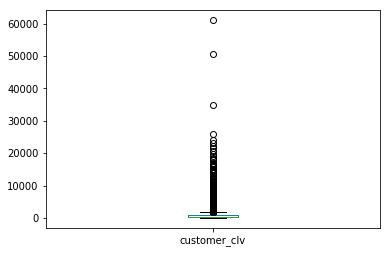

In [342]:
# box plot: visuele weergaven van de verdeling van de clv 
# zichtbaar = minimum, maximum, mediaan en kwartielafstanden 

import matplotlib.pyplot as plt 
df_clv.plot(y = 'customer_clv', kind = 'box') 
plt.show()

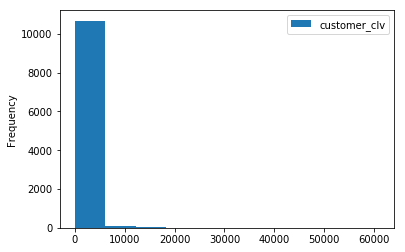

In [343]:
# histogram plot: visuele weergaven van frequentie verdeling van de clv 
# hoe vaak komt een clv waarde voor 

import matplotlib.pyplot as plt 
df_clv.plot(y = 'customer_clv', kind = 'hist') 
plt.show()